<a href="https://colab.research.google.com/github/jiayuanteng/Hands_on_ML2/blob/main/3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST dataset


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [3]:
mnist['data'].shape

(70000, 784)

In [4]:
X, y = mnist["data"], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


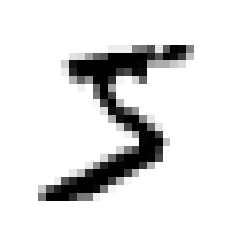

In [5]:
import numpy as np

import matplotlib.pyplot as plt

some_digit = np.array(X[0:1])
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [6]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [7]:
import numpy as np
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000]

# Training a binary classifer

In [8]:
# take one class: y = 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
# use SGD classifier - linear SVM with SGD
# use default loss function of soft margin linear svm. 
# use L2 regularization
# decision function uses threshold (threshold = 0) to determine class
# score>0 is True, or False
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict(some_digit)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [10]:
print(sgd_clf.predict(some_digit))

[ True]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [11]:
sgd_clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [12]:
sgd_clf.coef_.shape

(1, 784)

# Measuring accuracy using cross-validation
accuracy is not a preferred metrics. in the example here, accuracy is above 90% because only 10% of data is 5. 

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

In [14]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.loc[train_index]
  y_train_folds = y_train_5.loc[train_index]

  X_test_folds = X_train.loc[test_index]
  y_test_folds = y_train_5.loc[test_index]
  
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_folds)
  n_correct = sum(y_pred == y_test_folds)
  print(n_correct/len(y_pred))


0.9669
0.91625
0.96785


In [15]:
# use cross validation score
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [16]:
# accuracy is high because it is an easy task 
print ("non-5 ratio is {:.2%}".format(1-y_train_5.sum()/len(y_train_5)))

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y = None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype = bool)

non-5 ratio is 90.96%


In [17]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

# Confusion matrix

In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [19]:
# each row of confusion matrix is actual class
# each column is prediction
# first row is non-5

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

## Precision, Recall, and F1 Score
Precision = TP/(TP+FP)\
Recall = TP/(TP+FN). Recall is also called sensitivity\
F1 = 2/(1/Precision + 1/Recall) gives higher weight to a lower value measure. Classifier gets a high F1 scores if both precision and recall are high\
Choice of measures depend on the question in hand. In some cases, precision is preferred (e.g., cancer screening) or recall is preferred (e.g., shoplifter detector)

In [20]:
from sklearn.metrics import precision_score, recall_score

print("classifier is {:.2%} of the time".format(
    precision_score(y_train_5, y_train_pred)))


classifier is 83.71% of the time


In [21]:
print("classifier detects {:.2%} of 5s".format(recall_score(y_train_5, y_train_pred)))

classifier detects 65.12% of 5s


In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [23]:
sgd_clf.decision_function(some_digit)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2164.22030239])

## Relationship between precision and recall

In [24]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, 
                             cv = 3, method = "decision_function")

precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)


In [37]:
thresholds.shape

(59966,)

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
  plt.legend()

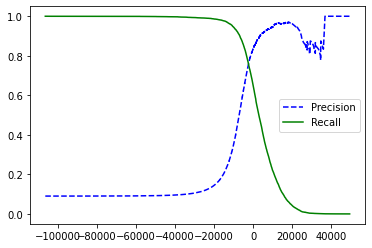

In [26]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

Text(0, 0.5, 'Precision')

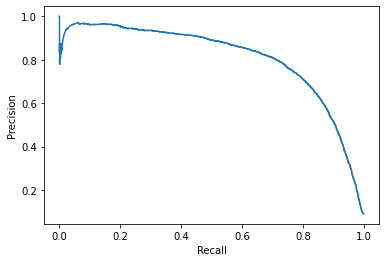

In [27]:
import pandas as pd
import numpy as np
precision_recall = np.concatenate((precision.reshape(-1,1), recall.reshape(-1,1)), axis=1).shape

plt.plot( recall[:-1], precision[:-1])
plt.xlabel("Recall")
plt.ylabel("Precision")


In [28]:
# suppose I want to target min 90% of precision
threshold_90_precision = thresholds[np.argmax(precision >=0.9)]
print(threshold_90_precision)

3370.019499143958


In [41]:
precision[np.argmax(precision >=0.9):].min()

0.7777777777777778

In [29]:
y_train_pred_90 = (y_scores>=threshold_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))


0.9000345901072293
0.4799852425751706


## ROC curve
Plot recall on false positive rate. FPR is % of negative cases classified incorrectly. FPR = 1-TNR. TNR is % of negative cases classified correctly. TNR is also called specificity.  \
The more true positive classifier produces, the more false positive it produces

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


In [50]:
def plot_roc_curve(fpr, tpr, label = "ROC"):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1], [0,1], "k--")
  plt.legend()
  plt.xlabel("False Positive Rate")
  plt.ylabel("Recall/Sensitivity")

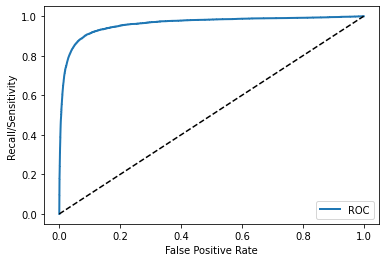

In [51]:
plot_roc_curve(fpr, tpr)

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616